In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interact
from ipywidgets import widgets
from math import sin, cos, pi, sqrt, hypot, atan2

In [6]:
class Line:
    
    def __init__(self, a, b, c):
        #коэффициенты общего уравнения
        self.a = a
        self.b = b
        self.c = c
        #вектор в проективном виде
        self.l = np.array([a, b, c])
        #ненормированный нормальный и направляющий
        self.N = np.array([a, b])
        self.V = np.array([-b, a])
        #нормированный нормальный и направляющий
        self.n = self.N / self.norm() #вместо ф-ии гипот, считает норму объекта по а, б, с
        self.v = self.V / self.norm()
        #расстояние от 0 до прямой
        self.d = self.c / self.norm()
        #произвольная точка на прямой
        self.P0 = -self.d * self.n
    
    def __repr__(self): #представление прямой в текстовом виде
        return f"""
        a = {self.l[0]}
        b = {self.l[1]}
        c = {self.l[2]}
        n = {self.n}
        v = {self.v}
        p_0 = {self.P0}
        """
        #c_a = {self.c_a}
        #c_b = {self.c_b}
        #k = {self.k}
        
    @classmethod #уравнение в отрезках
    def intercept_form(cls, c_a, c_b):
        #c_b*x+c_a*y-c_a*c_b=0
        return cls(c_b, c_a, -c_a*c_b) #cls - вызов init 
        
    @classmethod #y-kx-b=0
    def point_slope_form(cls, k, c_b):
        return cls(-k, 1, -c_b)

    @classmethod #по двум точкам
    def from_two_points(cls, P1, P2): #p1 p2 - np.arrays
        l = np.cross(P1, P2) #произведение векторов векторное
        a, b, c = l
        return cls(a, b, c)

    @classmethod #параметрическое
    def parametric_form(cls, V, p):
        Vx, Vy = V
        n = np.array([-Vy, Vx], dtype='float64')
        n /= np.linalg.norm(n)
        nx, ny = n
        d = -np.dot(n, p)
        return cls(nx, ny, d)
    
    def get_point(self, t):
        #параметрическое
        return self.P0 + t * np.v

    def norm(self):
        return hypot(self.a, self.b)

    def theta(self): #угол наклона вектора n
        nx, ny = self.n
        return atan2(ny, nx)

    def slope(self):
        if self.b == 0:
            return np.inf
        else:
            return -self.a / self.b



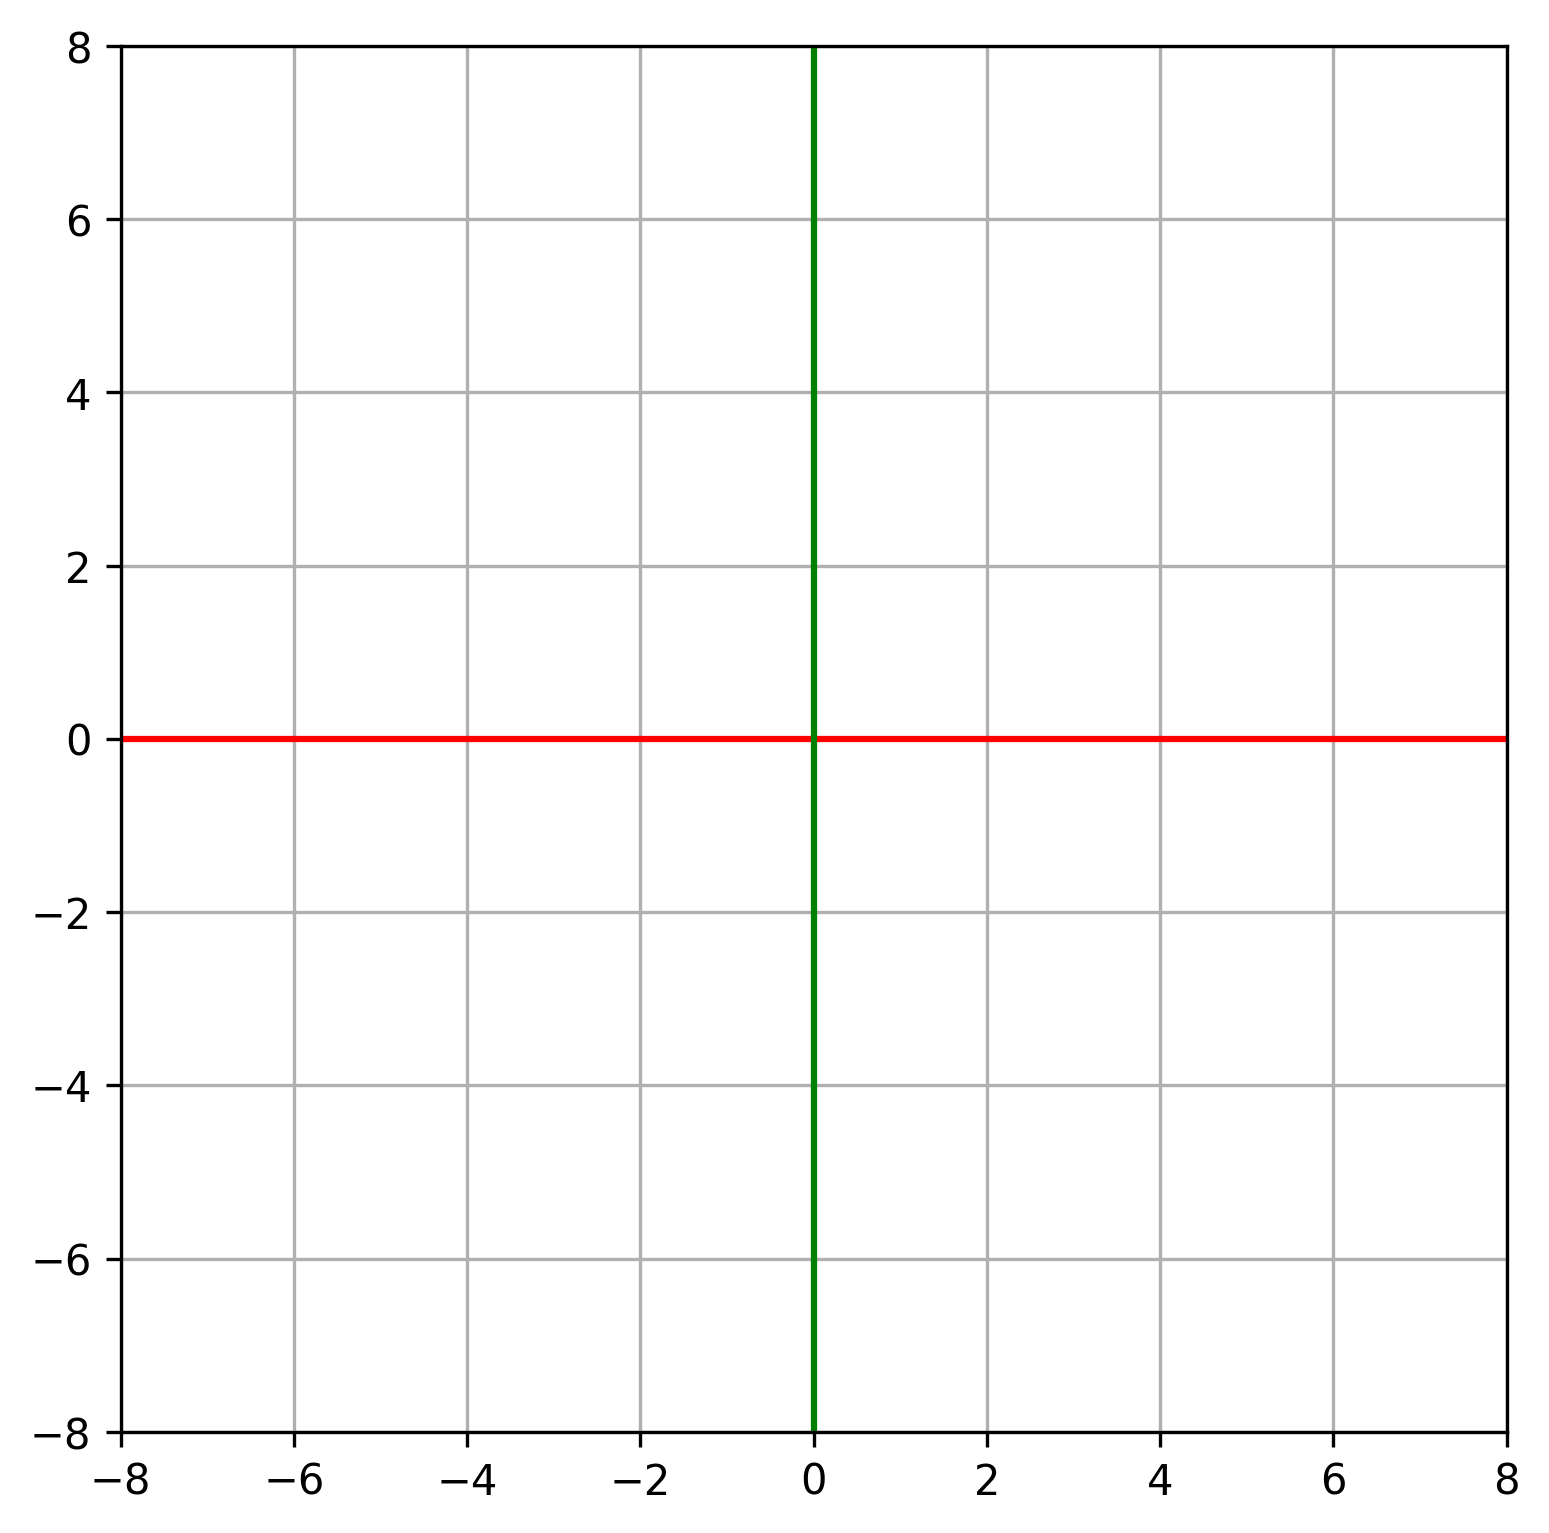

interactive(children=(FloatSlider(value=0.1, description='a', max=5.0, min=-5.0), FloatSlider(value=0.1, descr…

<function __main__.Graf(a=0.1, b=0.1, c=0.1)>

In [15]:
def Graf(a=0.1,b=0.1,c=0.1):

    fig01 = plt.figure(figsize=(6,6), dpi=300)
    ax01 = fig01.add_subplot(1, 1, 1)
    
    ax01.grid(True)
    ax01.set_aspect('equal')
    ax01.set_xlim(-8, 8)
    ax01.set_ylim(-8,8)
    
    ax01.axhline(0, color='r')  # Горизонтальная линия Ox
    ax01.axvline(0, color='g') 
    
    #визуализация прямых, заданных тремя способами 
    l1 = Line(a, b, c)
    l2 = Line.parametric_form(V=(-1,3), p=(-1,3))
    l3 = Line.from_two_points(np.array([2,2,1]), np.array([-2,-4,1]))

    x_ox = -с / a if a != 0 else None
    y_oy = с
    
    
    ax01.axline(xy1=l1.P0, slope=l1.slope(), c = 'blue', zorder = 10)
    ax01.axline(xy1=l2.P0, slope=l2.slope(), c = 'lightblue', zorder = 10)
    ax01.axline(xy1=l3.P0, slope=l3.slope(), c = 'red', zorder = 10)
    #визуализация направляющих и нормальных векторов:
    
    ax01.quiver(*l1.P0, *l1.v, angles='xy', scale_units='xy', scale=1, zorder=100, color='k')
    ax01.quiver(*l1.P0, *l1.n, angles='xy', scale_units='xy', scale=1, zorder=100, color='k')
    
    ax01.quiver(*l2.P0, *l2.v, angles='xy', scale_units='xy', scale=1, zorder=100, color='lightblue')
    ax01.quiver(*l2.P0, *l2.n, angles='xy', scale_units='xy', scale=1, zorder=100, color='lightblue')
    
    ax01.quiver(*l3.P0, *l3.v, angles='xy', scale_units='xy', scale=1, zorder=100, color='purple')
    ax01.quiver(*l3.P0, *l3.n, angles='xy', scale_units='xy', scale=1, zorder=100, color='purple')

    if x_ox is not None:
        plt.plot(x_ox, 0, 'ro', label='Пересечение с Ox')
        plt.plot(0, y_oy, 'go', label='Пересечение с Oy')

interact(Graf, a=(-5, 5, 0.1), b = (-5, 5, 0.1), c = (-5, 5, 0.1))